In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
plt.style.use('ggplot')

# 체크할 것 ( 다중선형회귀 분석시)

- 1. 상관관계  
- 2. 정규화  
- 3. 다중공선성

In [7]:
df = pd.read_csv('data/cars.csv',index_col='Unnamed: 0')
df.head(3)

,speed,dist
1,4,2
2,4,10
3,7,4


In [8]:
df.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

```

In [13]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
# print(boston['DESCR'])

```
CRIM: 범죄율 
INDUS: 비소매상업지역 면적 비율 
NOX: 일산화질소 농도 
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율 
B: 인구 중 흑인 비율 
PTRATIO: 학생/교사 비율 
ZN: 25,000 평방피트를 초과 거주지역 비율 
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율 
RAD: 방사형 고속도로까지의 거리 
DIS: 직업센터의 거리 
TAX: 재산세율
```

In [23]:
df_boston =pd.DataFrame(boston['data'],columns=boston['feature_names'])
df_boston['medv'] = boston['target']
y = boston['target']
df_boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [24]:
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
dfBoston = pd.DataFrame( boston['data'])
dfBoston.columns = boston['feature_names']
dfBoston['medv'] = boston['target']
dfBoston

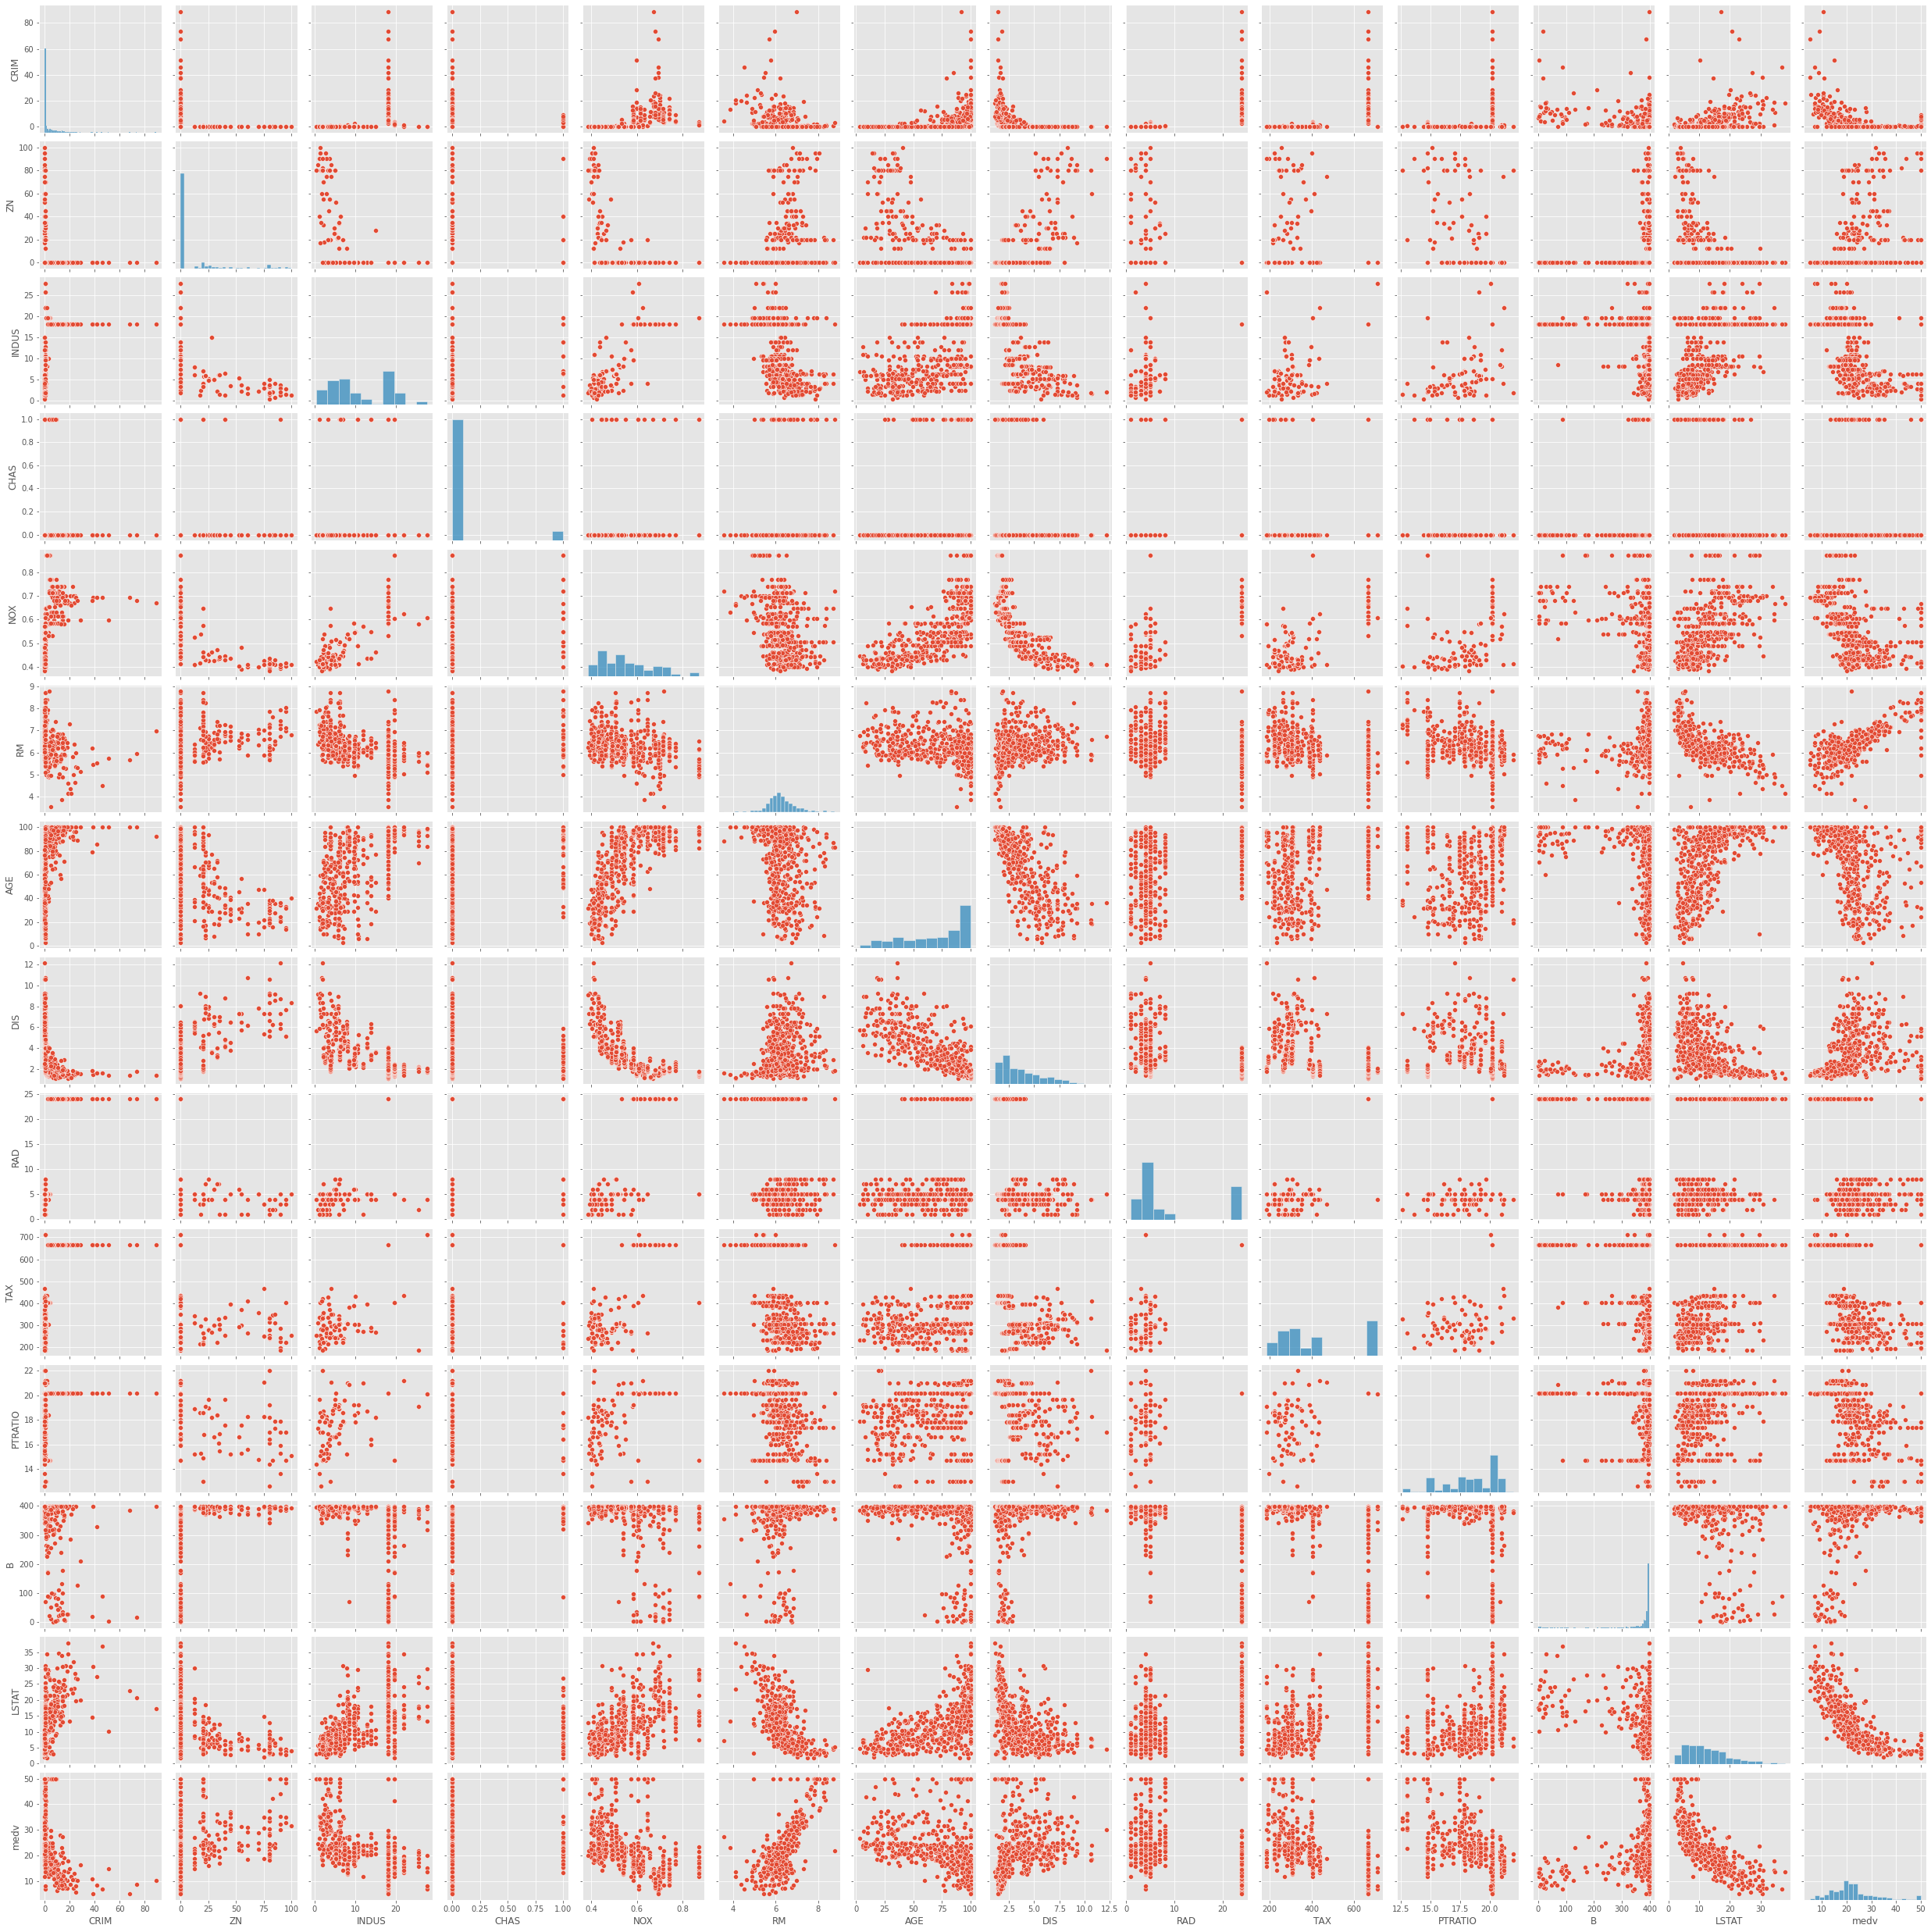

In [31]:
sns.pairplot(df_boston)
plt.show()

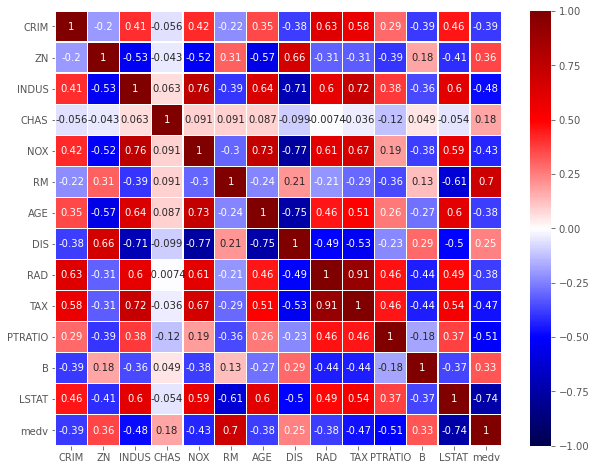

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df_boston.corr(),vmin=-1,annot=True, linewidths=0.2,cmap='seismic')
plt.show()

# Quiz
보스턴 데이터셋을 학습( 1.텐서, 2 케라스)하여  
특성데이터 0번째 행의 값의 주택중위가격을 예측

## 1. 텐서

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
import pandas as pd
from keras import metrics

from sklearn.metrics import r2_score

In [54]:
boston = load_boston()
df  = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['medv'] = boston['target']
y = boston['target']
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [55]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x = tf.constant(x, tf.float32)
y = tf.constant(y, tf.float32)

In [56]:
w = tf.Variable(tf.random.uniform([1]))
b = tf.Variable(tf.random.uniform([1]))

In [57]:
def compute_cost():
    hx=w*x+b
    cost=tf.reduce_mean((hx-y)**2)
    return cost

In [58]:
optimizer=Adam(learning_rate=0.01)

for i in range(2000):
    optimizer.minimize(compute_cost ,var_list=[w,b] )
    c=compute_cost().numpy()
    print(f'{i+1} cost={c}')

InvalidArgumentError: Incompatible shapes: [506,13] vs. [506] [Op:Sub]

In [59]:
def hxFn(x):
    hx=w*x+b 
    return hx.numpy()

In [60]:
hxFn(df.iloc[[0],:-1])

array([[0.85988617, 1.2716001 , 0.91259676, 0.85974157, 0.87205154,
        1.0101843 , 2.3515847 , 0.953325  , 0.8826226 , 7.632527  ,
        1.2098213 , 9.941222  , 0.9736891 ]], dtype=float32)

In [61]:
w.shape , b.shape

(TensorShape([1]), TensorShape([1]))

## 2. 케라스


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,Adagrad
import matplotlib.pyplot  as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
plt.style.use(['seaborn-white'])

In [19]:
boston = load_boston()
df  = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['medv'] = boston['target']
y = boston['target']
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [22]:
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,-1].values

In [23]:
dense = Dense(units = 1, input_dim = 13) 
model = Sequential([dense])
model.compile(loss='mse',optimizer=Adam(0.1))
# n행 3열
h = model.fit(x_data, y_data, epochs=500) # x값을 행렬로 주어야함


Epoch 1/500
16/16 [==============================] - 0s 598us/step - loss: 585.3320
Epoch 2/500
16/16 [==============================] - 0s 465us/step - loss: 174.8125
Epoch 3/500
16/16 [==============================] - 0s 532us/step - loss: 77.2144
Epoch 4/500
16/16 [==============================] - 0s 532us/step - loss: 62.8700
Epoch 5/500
16/16 [==============================] - 0s 532us/step - loss: 54.7247
Epoch 6/500
16/16 [==============================] - 0s 532us/step - loss: 52.6820
Epoch 7/500
16/16 [==============================] - 0s 532us/step - loss: 48.3465
Epoch 8/500
16/16 [==============================] - 0s 532us/step - loss: 53.2287
Epoch 9/500
16/16 [==============================] - 0s 465us/step - loss: 57.6093
Epoch 10/500
16/16 [==============================] - 0s 532us/step - loss: 47.8554
Epoch 11/500
16/16 [==============================] - 0s 532us/step - loss: 42.8350
Epoch 12/500
16/16 [==============================] - 0s 598us/step - loss: 53.0533

16/16 [==============================] - 0s 532us/step - loss: 39.4068
Epoch 99/500
16/16 [==============================] - 0s 532us/step - loss: 32.3334
Epoch 100/500
16/16 [==============================] - 0s 532us/step - loss: 39.2008
Epoch 101/500
16/16 [==============================] - 0s 465us/step - loss: 37.6038
Epoch 102/500
16/16 [==============================] - 0s 464us/step - loss: 36.5455
Epoch 103/500
16/16 [==============================] - 0s 465us/step - loss: 44.3975
Epoch 104/500
16/16 [==============================] - 0s 598us/step - loss: 32.1236
Epoch 105/500
16/16 [==============================] - 0s 532us/step - loss: 40.6612
Epoch 106/500
16/16 [==============================] - 0s 532us/step - loss: 64.0477
Epoch 107/500
16/16 [==============================] - 0s 532us/step - loss: 70.6374
Epoch 108/500
16/16 [==============================] - 0s 532us/step - loss: 61.4181
Epoch 109/500
16/16 [==============================] - 0s 599us/step - loss: 99.

16/16 [==============================] - 0s 465us/step - loss: 52.1663
Epoch 195/500
16/16 [==============================] - 0s 465us/step - loss: 91.2414
Epoch 196/500
16/16 [==============================] - 0s 465us/step - loss: 61.0323
Epoch 197/500
16/16 [==============================] - 0s 465us/step - loss: 55.6682
Epoch 198/500
16/16 [==============================] - 0s 532us/step - loss: 52.2437
Epoch 199/500
16/16 [==============================] - 0s 465us/step - loss: 64.0447
Epoch 200/500
16/16 [==============================] - 0s 465us/step - loss: 60.1829
Epoch 201/500
16/16 [==============================] - 0s 465us/step - loss: 43.0382
Epoch 202/500
16/16 [==============================] - 0s 465us/step - loss: 58.9025
Epoch 203/500
16/16 [==============================] - 0s 465us/step - loss: 67.0380
Epoch 204/500
16/16 [==============================] - 0s 532us/step - loss: 65.6824
Epoch 205/500
16/16 [==============================] - 0s 465us/step - loss: 49

16/16 [==============================] - 0s 532us/step - loss: 96.3018
Epoch 291/500
16/16 [==============================] - 0s 532us/step - loss: 48.8375
Epoch 292/500
16/16 [==============================] - 0s 465us/step - loss: 45.1807
Epoch 293/500
16/16 [==============================] - 0s 465us/step - loss: 59.0826
Epoch 294/500
16/16 [==============================] - 0s 465us/step - loss: 69.7875
Epoch 295/500
16/16 [==============================] - 0s 466us/step - loss: 51.3373
Epoch 296/500
16/16 [==============================] - 0s 532us/step - loss: 62.7521
Epoch 297/500
16/16 [==============================] - 0s 465us/step - loss: 92.3296
Epoch 298/500
16/16 [==============================] - 0s 503us/step - loss: 38.3480
Epoch 299/500
16/16 [==============================] - 0s 465us/step - loss: 42.3074
Epoch 300/500
16/16 [==============================] - 0s 465us/step - loss: 58.0088
Epoch 301/500
16/16 [==============================] - 0s 465us/step - loss: 35

16/16 [==============================] - 0s 467us/step - loss: 51.3805
Epoch 387/500
16/16 [==============================] - 0s 532us/step - loss: 44.4084
Epoch 388/500
16/16 [==============================] - 0s 532us/step - loss: 47.5518
Epoch 389/500
16/16 [==============================] - 0s 532us/step - loss: 44.3172
Epoch 390/500
16/16 [==============================] - 0s 465us/step - loss: 53.9722
Epoch 391/500
16/16 [==============================] - 0s 465us/step - loss: 34.5044
Epoch 392/500
16/16 [==============================] - 0s 465us/step - loss: 43.4537
Epoch 393/500
16/16 [==============================] - 0s 465us/step - loss: 97.4130
Epoch 394/500
16/16 [==============================] - 0s 465us/step - loss: 44.3808
Epoch 395/500
16/16 [==============================] - 0s 466us/step - loss: 46.5068
Epoch 396/500
16/16 [==============================] - 0s 465us/step - loss: 37.1351
Epoch 397/500
16/16 [==============================] - 0s 465us/step - loss: 27

16/16 [==============================] - 0s 532us/step - loss: 44.5143
Epoch 483/500
16/16 [==============================] - 0s 532us/step - loss: 42.7756
Epoch 484/500
16/16 [==============================] - 0s 465us/step - loss: 69.3078
Epoch 485/500
16/16 [==============================] - 0s 465us/step - loss: 108.7826
Epoch 486/500
16/16 [==============================] - 0s 465us/step - loss: 37.1615
Epoch 487/500
16/16 [==============================] - 0s 465us/step - loss: 57.4748
Epoch 488/500
16/16 [==============================] - 0s 443us/step - loss: 42.3596
Epoch 489/500
16/16 [==============================] - 0s 465us/step - loss: 33.9927
Epoch 490/500
16/16 [==============================] - 0s 465us/step - loss: 45.0430
Epoch 491/500
16/16 [==============================] - 0s 465us/step - loss: 32.5196
Epoch 492/500
16/16 [==============================] - 0s 532us/step - loss: 47.9970
Epoch 493/500
16/16 [==============================] - 0s 532us/step - loss: 2

In [24]:
w,b = dense.get_weights()
w.shape,b.shape  # w = 3행 1열

((13, 1), (1,))

In [51]:
model.predict(df.iloc[[0],:-1])

array([[29.484386]], dtype=float32)